In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random
from mpl_toolkits import mplot3d
%matplotlib inline

# **Ficha 2 - Exercício 2**
## Realizado pelos alunos da licenciatura em Engenharia Física:
### Maria Gabriela Oliveira, A92841;
### Miguel Caçador Peixoto, A92838;






##### 25 de outubro de 2021

## Mapa logístico

Um dos exemplos mais famosos de caos determinista é o mapa logístico, definido pela seguinte equação iterativa: $x'=rx(1-x)$. Para um determinado valor de $r$, considere um valor de $x$ e insira-o no lado direito da equação, obtendo um novo valor $x$. Esta operação iterativa deve ser repetida um número grande de vezes, podendo acontecer uma de 3 coisas:
*   os valores de $x$ convergem para um determinado número e estabilizam aí. Por exemplo $x = 0$ é sempre um ponto fixo no mapa logístico;
*   $x$ não converge para um único número, mas origina-se um padrão periódico em torno de um pequeno número de valores;
*  originam-se sequências de números pseudo-aleatórios (caos determinista).


(a) Escreva um programa que calcule e mostre o mapa logístico para r ∈ [0; 4], representando os resultados num grafico de $x$ em função de $r$.

*Nota*: Comece por fazer 1000 iterações para cada valor de $r$ e seguidamente implemente um novo ciclo com mais 1000 iterações para obter os valores que serão representados no gráfico.



In [ ]:

def logistic_map(x, r, out_len, max_depth):

    # Simula #max_depth anos
    for _ in range(max_depth):
        x = r*x*(1-x)

    # Após #max_depth anos, vamos simular
    # a população durante mais #out_len anos
    # mas, desta vez, vamos armazenar todos os valores
    # da população na variavel retorno.
    retorno = []
    for _ in range(out_len):
        x = r*x*(1-x)

        # Caso a população convirja num número muito grande.
        # De tal modo que seja impossível a sua representação (-inf, inf, ...),
        # retornar-se-á uma lista vazia, sinalizando que a função
        # não é definida para este valor de r.
        if np.isinf(x):
            return []

        retorno.append(x)

    return retorno


##Esboço do mapa logístico

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
No handles with labels found to put in legend.


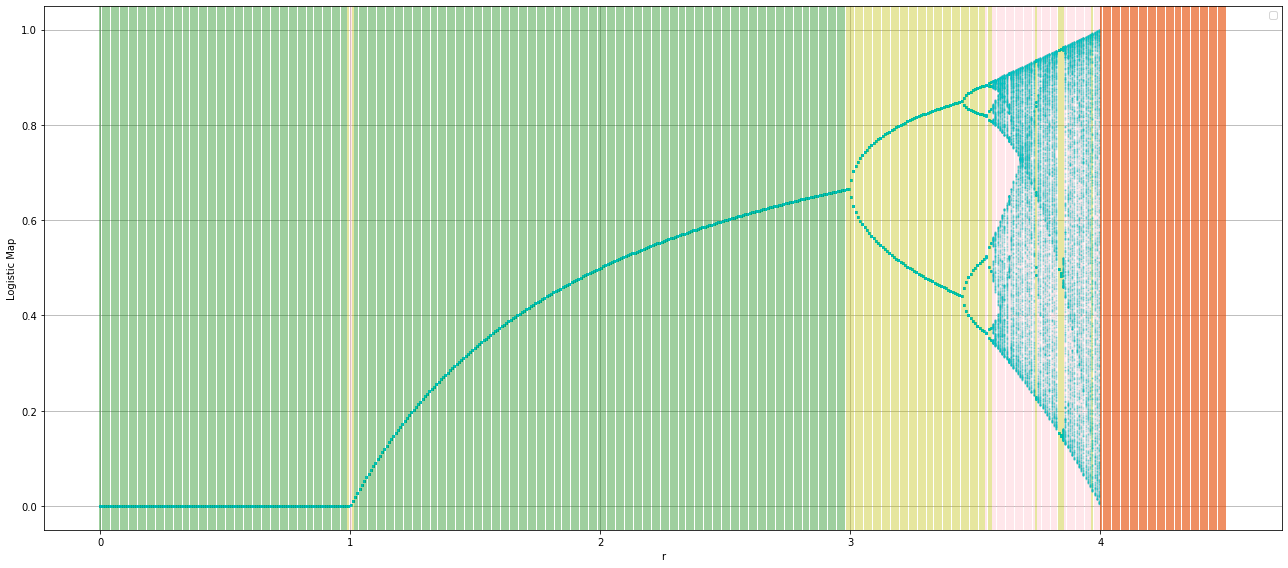

In [ ]:
fig, ax = plt.subplots(figsize=(18,8))
x0 = 0.6  # população  inicial

# Valores de r
r = np.linspace(0, 4.5, 500)
out_len = 1000
max_depth = 1000
for i in r:
    # Para cada valor de r, vamos computar os valores
    # para os quais a função logistica converge
    values = logistic_map(x0, i, out_len=out_len, max_depth=max_depth)

    # Vamos tentar computar para quantos valores converge
    # usando como threshold de comparação 7 casas decimais.
    valores_converge = len(set([round(x, 7) for x in values]))

    ## Ilustração das várias zonas de convergência (ou não convergência)
    # Não converge - todos os valores para os quais
    # a função converge são diferentes.
    if valores_converge == out_len and values != []:
        plt.axvline(x=i, color='pink', alpha=0.5)
    # Converge para 1
    elif valores_converge == 1:
        plt.axvline(x=i, color='g', alpha=0.5)
    # Converge para um  padrão periódico 
    else:
        plt.axvline(x=i, color='y', alpha=0.5)

    # Caso a função logistic_map retorne [],
    # o logistic map não se encontra definido
    # neste valor de r.
    if values == []:
        plt.axvline(x=i, color='r', alpha=0.5)

    ## Plot dos valores retornados por logistic_map
    plt.plot([i for _ in values], values, 'co', markersize=1, alpha=0.1)
   
ax.set_xlabel('r')
ax.set_ylabel('Logistic Map')

fig.tight_layout()
plt.grid()
plt.legend()
plt.show()

(b) Identifique os valores de $r$ para que surgem cada uma das 3 situações descritas acima.

Nos intervalos $r$ ∈ [0; 1] e $r$ ∈ [1; 3], os valores de $x$ convergem para um determinado número e estabilizam aí. (Verde)

No intervalo $r$ ∈ [3; 3,7] origina-se um padrão periódico em torno de um pequeno número de valores. (Amarelo)

No intervalo $r$ ∈ [3,7; 4] originam-se sequências de números pseudo-aleatórios (caos determinista). (Cor de rosa)

E finalmente, no intervalo de $r$ ∈ [4; 5] todos os valores parecem convergir para $-\infty$ (a função não é definida).

Note que, de modo a formular as diferentes "zonas" foi tido em consideração um threshold de comparação de 7 casas decimais. Ou seja se dois números diferem na 8º casa decimal, estes são considerados iguais para efeitos de convergência.

Olhando as cores do gráfico percebe-se que o ponto r=1 tem um comportamento diferente da sua vizinhança. Apesar de tanto à sua direita como à sua esquerda os valores de $x$ convergirem nesse ponto há uma bifurcação transcrítica - as sigularidades estáveis passam a instáveis e as instáveis a estáveis - e daí a nível matemático, apesar de convergir igualmente, encontra-se essa irregularidade.

Outro ponto que sobressaí é na zona rosa haver algumas barras amarelas. Apesar da zona rosa definir o conhecido caos determinista, essas barras amarelas correspondem a "ilhas de estabilidade". Nestas ilhas de estabilidade o mapa logístico comparta-se como um fractal, ou seja, se se fizesse zoom no mapa nessas zonas veriamos um novo padrão igual ao encontrado (no mapa logístico em si).



# Desconstruindo o problema
## Função logística

Olhando simplesmente para a função logistica, podemos equipara-la ao problema da evolução da população de uma espécie ao longo do tempo.

Ou seja,

$x' = r*x*(1-x) \approx x_{n+1} = r*x_n*(1-x_n)$

Sendo $x_n$ a população do ano atual e $x_{n+1}$ a população no ano seguinte.

No gráfico seguinte podemos ver que esta função não passa apenas de uma parábola.

In [ ]:
def logistic_function(x, r):
    return r*x*(1-x)


In [ ]:

def iteractive_plot( r):
    fig, ax = plt.subplots(figsize=(10,7))

    # Get the values of our function and plot it
    x = np.linspace(0, 1, 100)
    y = [logistic_function(i, r) for i in x]
    ax.plot(x, y)

    ax.set_ylabel('$Population_{n+1}$')
    ax.set_xlabel('$Population_{n}$')

    fig.tight_layout()
    plt.show()
    return()

    
interact(iteractive_plot,r=(0,5,0.1))

interactive(children=(FloatSlider(value=2.0, description='r', max=5.0), Output()), _dom_classes=('widget-inter…

<function __main__.iteractive_plot>

No gráfico acima vemos o termo n+1 em função do termo n.

E se chamarmos a função mais uma vez? O que acontece? 

Lembre-se que o mapa logístico não passa de uma chamada recursiva desta parábola para cada valor de r.

In [ ]:
def iteractive_plot( r):
  axes = plt.axes(projection="3d")


  # Get the values of our function and plot it
  x = np.linspace(0, 1, 100)
  y = [logistic_function(i, r) for i in x]
  z = [logistic_function(a,r) for a in y]


  axes.plot3D(x,y,z,'co')



  axes.set_ylabel('$Population_{n+1}$')
  axes.set_xlabel('$Population_{n}$')
  axes.set_zlabel('$Population_{n+2}$')

  fig.tight_layout()
  plt.show()
  return()

    
interact(iteractive_plot,r=(0,5,0.1))
  


interactive(children=(FloatSlider(value=2.0, description='r', max=5.0), Output()), _dom_classes=('widget-inter…

<function __main__.iteractive_plot>

Iterando a parábola 2 vezes vê-se claramente que o valor de r altera significativemente a imagem produzida e que para r superior a 4 a parábola curva de tal forma que atinge valores negativos, daí o mapa logístico não ser definido para r superior a 4.

## Evolução temporal da população

Tendo novamente como ponto de partida a simples parábola da função logística, é possível fazer um gráfico da evolução de uma determinada população ao longo do tempo. Ou seja para cada valor de t, teremos $P(t) = r*P(t-1)*(1-P(t-1))$. Sendo $P$ a população dada pela função logística.


Neste gráfico pode-se ver como evolui a população para uma determinada taxa de crescimento $r$ e populção inicial $x_{0}$.

In [ ]:

def iteractive_plot(x0, r):
    fig, ax = plt.subplots(figsize=(10,7))

    # Get the values of our function and plot it
    t = np.linspace(0, 50, 50)
    y = []
    previous = x0
    for i in t:
        actual = logistic_function(previous, r)
        y.append(actual)
        previous = actual

    ax.plot(t, y, color='c')
    ax.plot(t, y, 'co')

    ax.set_ylabel('Population')
    ax.set_xlabel('Time')

    fig.tight_layout()
    #plt.legend()
    plt.show()
    return()

    
interact(iteractive_plot, x0=(0,1,0.1), r=(0,5,0.1),  resolution=(1,200,10))

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.0), FloatSlider(value=2.0, description='r…

<function __main__.iteractive_plot>

Desta forma, fixando o $x_{0}$ a 0.6 por exemplo podemos observar as mesmas situações observadas na alínea b).

Nos intervalos $r$ ∈ [0; 1] e $r$ ∈ [1; 3], os valores de $x$ convergem para um determinado número e estabilizam aí.
Em termos populacionais no intervalo $r$ ∈ [0; 1] a população eventualmente vai morrer na sua totalidade.

No intervalo $r$ ∈ [3; 3,7] origina-se um padrão periódico em torno de um pequeno número de valores.

No intervalo $r$ ∈ [3,7; 4] originam-se sequências de números pseudo-aleatórios (caos determinista).

E finalmente, no intervalo de $r$ ∈ [4; 5] todos os valores parecem convergir para $-\infty$ (a função não é definida).
